In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

# Advection equation

Advection is an important process in many aspects of astrophysics. For example, some transport models cosider shock-accelerated particles distributions in the heliosphere that are described, in a first approximation, by one-dimensional advection-diffusion equationfor the particle density. In the weak diffusion approximation the equation to solve is

$$\frac{\partial u}{\partial t} + v\frac{\partial u}{\partial x} = 0 $$

where $v$ is a constant advection speed that can be interpreted as the background solar wind speed. As a first example in solving partial differential equations, we will equation to advect a Gaussian profile 

$$\Psi_{o} = \Psi(x,t = 0) = e^{-\frac{(x-x_{o})^{2}}{(2\sigma^{2})}}$$

with $x_{o} = 30$, $\sigma = \sqrt{15}$, with positive velocity $v = 0.1$ in a $[0,100]$ domain. In order to handle the boundaries, we eill choose "outflow"boundary conditions, that simply copy the data of the last interior grid point into the boundary points 



Text(0,0.5,'$\\Psi$')

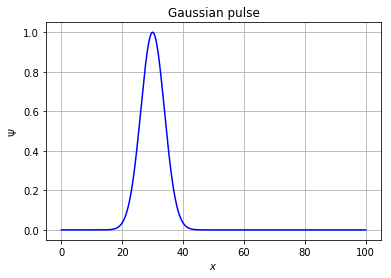

In [2]:
def Gaussian(x,xo,σ):
    return np.exp(-((x-xo)**2)/(2*σ**2))



xo = 30
x = np.linspace(0,100,1000)
v = 0.1
σ = np.sqrt(15)
plt.plot(x,Gaussian(x,xo,σ),"b-")
plt.grid(True)
plt.title("Gaussian pulse")
plt.xlabel("$x$")
plt.ylabel("$\Psi$")

Implement the upwind scheme and demostrate by experiment that it is stable for $0\leq \alpha = v \Delta t/\Delta x \leq 1$. 

### 1.
Implement  an error measure and make a plot of the error as a functionof time.Now try a Gaussian with a 5 times smaller $\sigma$. What do you observe regarding the errorand the visual comparison with the analytic result?

We consider the upwind discretization in the second order in the spatial derivative

$$\left(v\frac{\partial u}{\partial x}\right)_{i} = \left\{
        \begin{array}{ll}
            v\frac{3u_{i}^{n}-4u_{i-1}^{n}+u_{i-1}^{n}}{2(x_{i}-x_{i-1})} & \quad v > 0 \\
            v\frac{-3u_{i}^{n}+4u_{i+1}^{n}-u_{i+2}^{n}}{2(x_{i+1}-x_{i})} & \quad v < 0
        \end{array}
    \right.$$
    
In the time we consider first order in the time discretization , following 

$u>0$

$$u_{i}^{n+1} = u_{i}^{n}-vdt\frac{3u_{i}^{n}-4u_{i-1}^{n}+u_{i-1}^{n}}{2(x_{i}-x_{i-1})}$$

$u<0$

$$u_{i}^{n+1} = u_{i}^{n}-vdt\frac{3u_{i}^{n}-4u_{i-1}^{n}+u_{i-1}^{n}}{2(x_{i}-x_{i-1})}$$

the code

In [3]:
N = 512
m = 300
L = 100
dt = 0.5
alpha = v*dt*N/L

def advection(m,N,σ):
    x = np.linspace(0,L,N)
    U = np.zeros((m+1,N))
    U[0] = Gaussian(x,xo,σ)
    U[0,0] = 0
    for j in range(0,m):
        if v > 0:
            for i in range(2,N-1):
                U[j+1,i] = (U[j,i])-(0.5*v*dt/(x[i]-x[i-1]))*(3.0*U[j,i]-4.0*U[j,i-1]+U[j,i-2])
            U[j+1,-1] = U[j+1,-2]
        else:
            for i in range(2,N-1):
                U[j+1,i] = (U[j,i])-(0.5*v*dt/(x[i]-x[i-1]))*(-3.0*U[j,i]+4.0*U[j,i+1]-U[j,i+2])
            U[j+1,-1] = U[j+1,-2]
    return U



Now implement the error in the following way 

$$\epsilon = \frac{\sum_{i}|\phi_{i}^{\text{exact}}-\phi_{i}|}{N}$$


In [5]:
x = np.linspace(0,L,N)

def Error(m):
    return np.sum(np.abs(Gaussian(x-v*dt*m,xo,σ)-advection(m,N,σ)[-1]))/N
    
t = np.arange(0,1100,100)
E=[]
for i in t:
    E.append(100*Error(i))
    


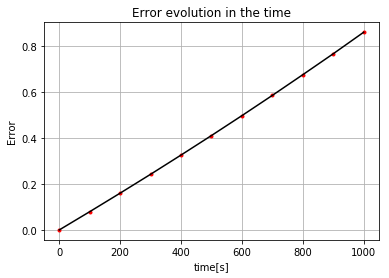

In [6]:
plt.plot(t,E,"r.")
plt.plot(t,E,"k-",label = "Error /%")
plt.xlabel("time[s]")
plt.ylabel("Error")
plt.title("Error evolution in the time")
plt.grid(True)

Plot of the evolution of the gaussian pulse 

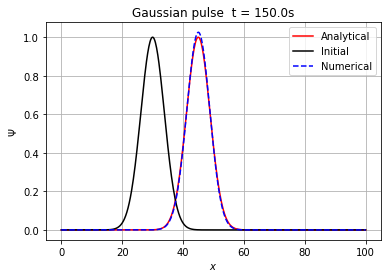

In [9]:
plt.plot(x,Gaussian(x-v*dt*m,xo,σ),"r-",label = "Analytical")
plt.plot(x,Gaussian(x,xo,σ),"k-",label = "Initial")
plt.plot(np.linspace(0,L,N),advection(m,N,σ)[-1],"b--",label = "Numerical")
#plt.plot(np.linspace(0,L,N),advection(m,N,σ/5)[-1],"g--",label = "$\sigma/5$")
plt.title("Gaussian pulse  t = "+str(dt*m)+"s")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$\Psi$")
plt.grid(True)


 5 times smaller  σ

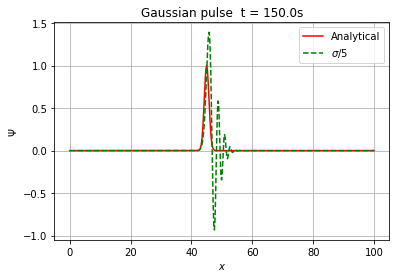

In [10]:
plt.plot(x,Gaussian(x-v*dt*m,xo,σ/5),"r-",label = "Analytical")
plt.plot(np.linspace(0,L,N),advection(m,N,σ/5)[-1],"g--",label = "$\sigma/5$")
plt.title("Gaussian pulse  t = "+str(dt*m)+"s")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$\Psi$")
plt.grid(True)



The reduction of  $\sigma$ value produce instability in the code

### 2.

Implement the unstable FTCS scheme and observe the development of instability. Make a few plots and describe what you observe

In [11]:
N = 512
m = 1000
L = 100
dt = 0.5
alpha = v*dt*N/L

def advectionFTCS(m,N,σ):
    x = np.linspace(0,L,N)
    U = np.zeros((m+1,N))
    U[0] = Gaussian(x,xo,σ)
    U[0,0] = 0
    for j in range(0,m):
        for i in range(2,N-1):
            alpha = v*dt/(x[i+1]-x[i-1])
            U[j+1,i] = alpha*U[j,i-1]+U[j,i]-alpha*U[j,i+1]      
        U[j+1,-1] = U[j+1,-2]
    return U

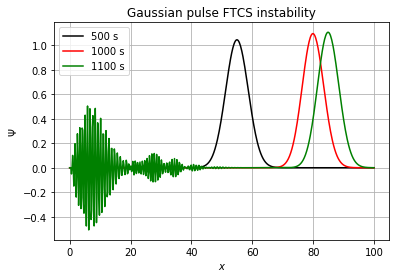

In [12]:
plt.plot(np.linspace(0,L,N),advectionFTCS(500,N,σ)[-1],"k-",label = "500 s")
plt.plot(np.linspace(0,L,N),advectionFTCS(1000,N,σ)[-1],"r-",label = "1000 s")
plt.plot(np.linspace(0,L,N),advectionFTCS(1100,N,σ)[-1],"g-",label = "1100 s")
plt.title("Gaussian pulse FTCS instability")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$\Psi$")
plt.grid(True)



